c:\users\asmarus\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Precision =  0.9789860099433461
Recall =  0.9742549764123806
F1-score =  0.9766147635524798


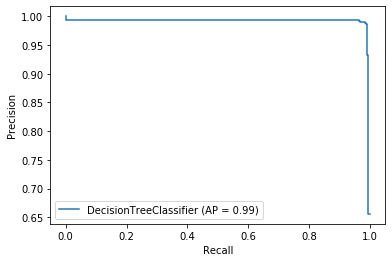

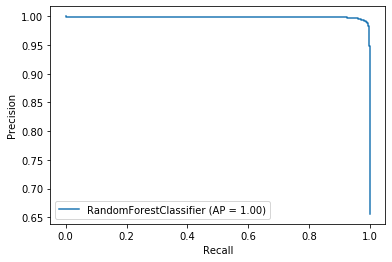

In [31]:
import random
import numpy as np
import pandas as pd
import kf_ml_lib as kf

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
 

# Load, process and split dataset
dataset = kf.load_dataset("../Datasets/ISOT Botnet 2010/Pre-processed/isot_botnet.csv")
X, y = kf.split_dataset(dataset, extended=False)

y = np.split(y, 1)
y = np.array(y)
y = y.reshape(len(y[0]), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

# Fit model to training data
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)


# Make predictions on the test data
preds = model.predict(X_test)

# Evaluate model Precision, Recall and F1-Score performance
precision = metrics.precision_score(y_test, preds, pos_label='Botnet')
recall = metrics.recall_score(y_test, preds, pos_label='Botnet')
f1_score = kf.calc_f1_score(precision, recall)

print("Precision = ", precision)
print("Recall = ", recall)
print("F1-score = ", f1_score)

metrics.plot_precision_recall_curve(model, X_test, y_test)
metrics.plot_precision_recall_curve(rf, X_test, y_test)


In [22]:
print(y)

y = np.split(y, 1)
y = np.array(y)
y = y.reshape(len(y[0]), 1)

print(y)

[['Botnet']
 ['Botnet']
 ['Botnet']
 ...
 ['Normal']
 ['Normal']
 ['Normal']]
[['Botnet']
 ['Botnet']
 ['Botnet']
 ...
 ['Normal']
 ['Normal']
 ['Normal']]
